<a href="https://colab.research.google.com/github/soy-esaul/Ejercicios-RNA/blob/main/Descenso_gradiente.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Primero importamos numpy
import numpy as np

# Ahora definimos dos funciones, la primera es la sigmoide que a cualquier número,
# le asigna un valor entre -1 y 1
def sigmoide(x):
  return 1.0/(1+ np.exp(-x))

# Luego definimos la derivada de la sigmoide
def sigmoide_derivada(x):
  return x * (1.0 - x)

In [ ]:
# Para definir una red lo primero es establecer los valores de entrada, salida y
# pesos de las aristas. Los pesos los definimos de manera aleatoria. La función shape
# genera el tamaño de la matriz que la llama.

class RedNeuronal:
  def __init__(self, x, y):
    self.entrada    = x
    self.aristas1   = np.random.rand(self.entrada.shape[1],4) 
    self.aristas2   = np.random.rand(4,1)                 
    self.y          = y
    self.salida     = np.zeros(self.y.shape)
    self.lista_err  = list()

  # En esta clase definimos la función feedforward que es la propagación hacia adelante
  def feedforward(self):
    self.capa1  = sigmoide(np.dot(self.entrada, self.aristas1))
    self.salida = sigmoide(np.dot(self.capa1, self.aristas2))

  # También debemos definir la propagación hacia atrás
  def backprop(self):
    # La función de costo que determina el parecido entre la salida que produce la red y 
    # la salida que esperamos se calcula con la regla de la cadena de las aristas
    diferencia = self.y - self.salida
    error = 0
    for i in range(len(diferencia)):
      error += (diferencia[i])**2
    self.lista_err.append(error[0])
    d_aristas2 = np.dot(self.capa1.T, (diferencia * sigmoide_derivada(self.salida)))
    d_aristas1 = np.dot(self.entrada.T,  (np.dot(diferencia * sigmoide_derivada(self.salida), self.aristas2.T) * sigmoide_derivada(self.capa1)))

    # Cambiamos los valores de las aristas para repetir el proceso y mejorar
    # la salida de la Red Neuronal hasta aproximar lo que deseamos
    self.aristas1 += d_aristas1
    self.aristas2 += d_aristas2

In [ ]:
# La matriz X es un arreglo de vectores que son la entrada de nuestra Red Neuronal
X = np.array([[0,0,1],
              [0,1,1],
              [1,0,1],
              [1,1,1]])

# El vector y es la salida que esperamos que produzca nuestra red
y = np.array([[1],[.3],[0],[.2]])

# Creamos un objeto 
nn = RedNeuronal(X,y)

# Entrenamos la Red Neuronal con un ciclo for
epochs = 100
for i in range(epochs):
  nn.feedforward()
  nn.backprop()

print(nn.salida)
print(y)

[[0.58200343]
 [0.3973564 ]
 [0.27302534]
 [0.18515252]]
[[1. ]
 [0.3]
 [0. ]
 [0.2]]


# Ejercicios:

1. Cambia la función de costo para medir el error lineal, cuadrático y cúbico; considerando que este es el error cuadrático: ```error += (diferencia[i])**2```

2. En un mismo plot grafica y compara los errores

3. Aumenta el número de epocas y vuelve a comparar. ¿Qué nos dice esto del decenso del gradiente? ¿Qué fucnión de costo es mejor?

Aquí hay más información del decenso gradiente:
https://towardsdatascience.com/gradient-descent-algorithm-and-its-variants-10f652806a3

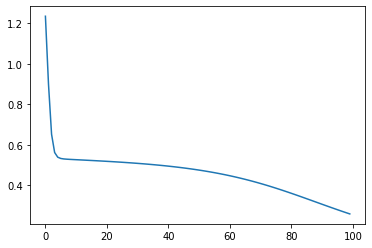

In [ ]:
import matplotlib.pyplot as plt

plt.plot(nn.lista_err)
plt.show()

## Ejercicio 1

In [ ]:
class RedNeuronal_err:
  ''' Red neuronal que puede usar error lineal, cuadrático cúbico
  Argumentos:
     x: Entrada
     y: Salida
     n \in {1,2,3}: tipo de error'''
  def __init__(self, x, y, n):
    self.entrada    = x
    self.aristas1   = np.random.rand(self.entrada.shape[1],4) 
    self.aristas2   = np.random.rand(4,1)                 
    self.y          = y
    self.salida     = np.zeros(self.y.shape)
    self.lista_err  = list()
    self.n          = n

  # En esta clase definimos la función feedforward que es la propagación hacia adelante
  def feedforward(self):
    self.capa1  = sigmoide(np.dot(self.entrada, self.aristas1))
    self.salida = sigmoide(np.dot(self.capa1, self.aristas2))

  # También debemos definir la propagación hacia atrás
  def backprop(self):
    # La función de costo que determina el parecido entre la salida que produce la red y 
    # la salida que esperamos se calcula con la regla de la cadena de las aristas
    diferencia = self.y - self.salida
    error = 0
    for i in range(len(diferencia)):
      error += (diferencia[i])**self.n
    self.lista_err.append(error[0])
    d_aristas2 = np.dot(self.capa1.T, (diferencia * sigmoide_derivada(self.salida)))
    d_aristas1 = np.dot(self.entrada.T,  (np.dot(diferencia * sigmoide_derivada(self.salida), self.aristas2.T) * sigmoide_derivada(self.capa1)))

    # Cambiamos los valores de las aristas para repetir el proceso y mejorar
    # la salida de la Red Neuronal hasta aproximar lo que deseamos
    self.aristas1 += d_aristas1
    self.aristas2 += d_aristas2

In [ ]:
# Creamos las redes con los tres tipos de error
nn1 = RedNeuronal_err(X,y,1)
nn2 = RedNeuronal_err(X,y,2)
nn3 = RedNeuronal_err(X,y,3)

# Creamos una lista con las redes:
Redes = [nn1, nn2, nn3]

# Entrenamos las redes:
epochs = 100
for i in range(epochs):
  for red in Redes:
    red.feedforward()
    red.backprop()

# Salida de cada red:
for red in Redes:
  print("Exponente: ", Redes.index(red), "\nSalida:\n", red.salida, '\n')


Exponente:  0 
Salida:
 [[0.52594248]
 [0.42001926]
 [0.26950155]
 [0.22945289]] 

Exponente:  1 
Salida:
 [[0.72947279]
 [0.39789858]
 [0.18827247]
 [0.10022684]] 

Exponente:  2 
Salida:
 [[0.52662114]
 [0.38418196]
 [0.30023139]
 [0.23649278]] 



### Ejercicio 2

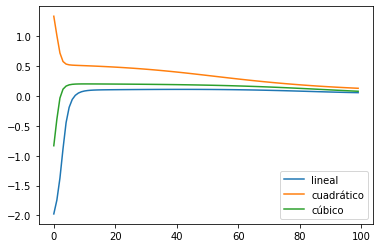

In [ ]:
# Gráfica de los errores en cada red
for red in Redes:
  plt.plot(red.lista_err)
  plt.legend(['lineal','cuadrático','cúbico'], loc="lower right")

plt.show()

### Ejercicio 3

0.04017592663990735
0.004845160240209293
0.0007856055768789339


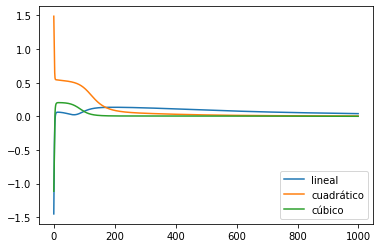

In [ ]:
# Creamos las redes de nuevo para inicializar los valores desde cero
nn1 = RedNeuronal_err(X,y,1)
nn2 = RedNeuronal_err(X,y,2)
nn3 = RedNeuronal_err(X,y,3)

# Creamos una lista con las redes:
Redes = [nn1, nn2, nn3]

# Entrenamos de nuevo con más épocas
epochs = 1000
for i in range(epochs):
  for red in Redes:
    red.feedforward()
    red.backprop()

# Graficamos de nuevo los errores en cada red
for red in Redes:
  plt.plot(red.lista_err)
  plt.legend(['Lineal','Cuadrático','Cúbico'], loc="lower right")
  print(red.lista_err[-1])

plt.show()

## Conclusiones:

De los tres tipos de red, la que usa error cuadrático medio es la que tarda más épocas para llegar a un error menor que 0.5, mientras que después de alrededor de 180 épocas, la red con error lineal converge más lentamente que las otras dos hacia el cero. 

La red con error cúbico es la que converge más rápidamente y la que tiene un error final más próximo a cero, esto no es necesariamente bueno, pues un modelo con un error demasiado bajo para el conjunto de entrenamiento puede estar "sobre entrenado", lo que significa que al usar esta red con valores nuevos puede tener un desempeño más pobre. Normalmente se busca en la red neuronal un equilibrio entre un buen ajuste a los datos y un cierto grado de flexibilidad, que considere la presencia de ruido aleatorio en los mismos, en este sentido, la red con error cuadrático medio es la que mejor cumple con estas características.

Por otra parte, al variar las épocas de entrenamiento, se nota que el ritmo de convergencia disminuye, entonces a partir de cierto punto ya no se logra mejorar significativamente el entrenamiento, aunque si se invierte más tiempo. Esto es debido a que el ritmo de aprendizaje está dado en función del error, por lo tanto a medida que disminuye el error, también lo hace el ritmo de aprendizaje. EL objetivo es entonces definir una cantidad de épocas de entrenamiento lo suficientemente grande para que se logre ajustar a un nivel de error aceptable, y lo suficientemente pequeño para no desperdiciar tiempo de cómputo o sobre entrenar el modelo.